# Statistical Convergence Verification Case

## Convergence case for ...

This notebook runs a user set number of convergence cases and plots varisous flow properties to compare and verifiy the statistical convergence of the simulations.

In [1]:
%matplotlib inline

In [2]:
%config InlineBackend.figure_format = 'svg'

In [3]:
#First things first change to your working directory containing your HiPSTAR case
import os
os.chdir('/home/rp3e11/drive2/HPT/inlet_turb_study/HPT_LS05_DOM30_TI5/convergence/')
casedir=os.getcwd()

In [4]:
name_for_files='LS05_TI5'

In [5]:
#Set up environemnt
import sys
#Append PLATUS libraries if these are not set in your PYTHONPATH 
#sys.path.append('/home/jl12e12/PLATUS/')
#sys.path.append('/home/jl12e12/PLATUS/fortran/lib/')
import lib_hipstar as lh
import tools
import lines as l
import numpy as np
import matplotlib.pyplot as plt
from matplotlib2tikz import save as tikz_save
tikz=True
pdf=True

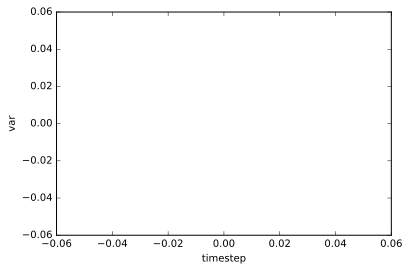

In [6]:
mon_point_id=2
var_index=7
skip=10
save_fig=False
#======================================
#  end user input
#======================================

start_name='monitor_point_%i'%mon_point_id
files= os.listdir('../mon_point/')
red_files=[]
for f in files:
    if f.startswith(start_name):
        temp='../mon_point/'+f
        red_files.append(temp)

red_files.sort()
time=[]
step=[]
var=[]
for f in red_files:
    file1=open(f,'r')
    count=1
    for line in file1:
        if count==0:
            li=line.split()
            step.append(float(li[0]))
            time.append(float(li[1]))
            var.append(float(li[var_index]))
            count=10
        else:
            count-=count
plt.figure()
plt.plot(step,var)
plt.xlabel('timestep')
plt.ylabel('var')
if save_fig:
    plt.savefig('time_hist_var.pdf')
     

In [7]:
#get list of directories to loop though
postdir =  os.walk('.').next()[1]
postdir = [casedir+'/'+i for i in postdir]

# Wake plots

Plot wake values of each statistics run and compare 

In [8]:
#USER INPUT
#Change if you want a different down stream plane
# Specify the down stream wake plane you want with [[x,y][x,y]] 
# add other planes by adding the same format
wp=[[[-.3,-1.0],[-.3,0.7]],[[1.1,-1.75],[1.1,1.4]],[[1.2,-1.75],[1.2,1.4]]]
n_prof=len(wp)

In [9]:
#Extract lines from each convergence case
inf=lh.infile('../cascade3d.in')
dt=inf.dth
wake=[]
for j in wp:
    wake.append(l.lines())

    for i in postdir:
        d=i.split('/')
        d=d[-1].split('_')
        d1=float(d[0])*dt
        d2=float(d[2])*dt
        d="%4.1f to %4.1f"%(d1,d2)
        wake[-1].extr_line(j[0],j[1],500,i+'/STAT_cont.bin',force_read=True,label=d)
        wake[-1].order_ymin()


reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted
reading data from file previously extracted


In [10]:
if False:
    plot_ids=[]
    plot_ids.append(wake[0].l[0].var.get_index(119,4))




    for j in range(n_prof):
        print 'Wake profiles for x position: ',wp[j][0][0] 
        wake[j].plot_var(plot_ids,[1],fig_num=j)
        plt.figure(j)
        if tikz:
            tikz_save("stat_conv_TI_%s_%i.tikz"%(name_for_files,j),
                      figureheight = '\\fh',
                      figurewidth = '\\fw')
        if pdf:
            plt.savefig("stat_conv_TI_%s_%i.pdf"%(name_for_files,j))
        

Wake profiles for x position:  -0.3
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


/usr/local/lib/python2.7/dist-packages/matplotlib/artist.py:221: MatplotlibDeprecationWarning: This has been deprecated in mpl 1.5, please use the
axes property.  A removal date has not been set.
  warnings.warn(_get_axes_msg, mplDeprecation, stacklevel=1)


Wake profiles for x position:  1.1
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.2
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Mi

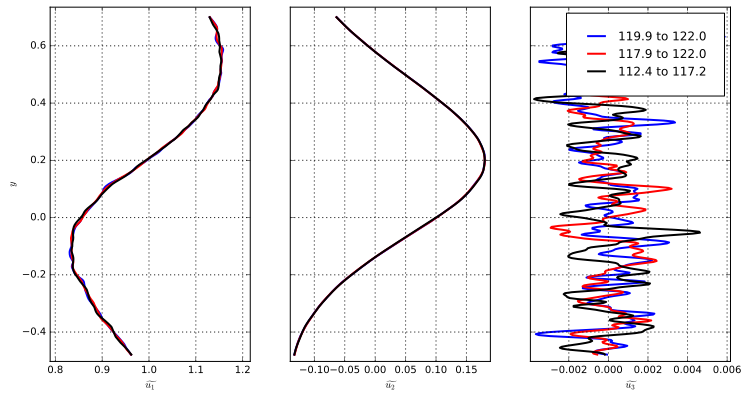

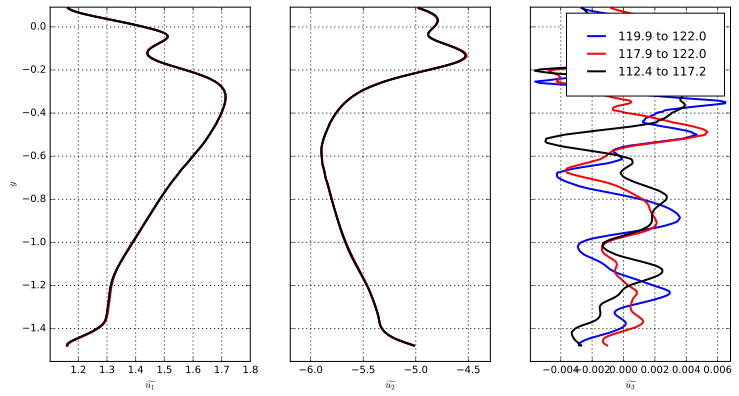

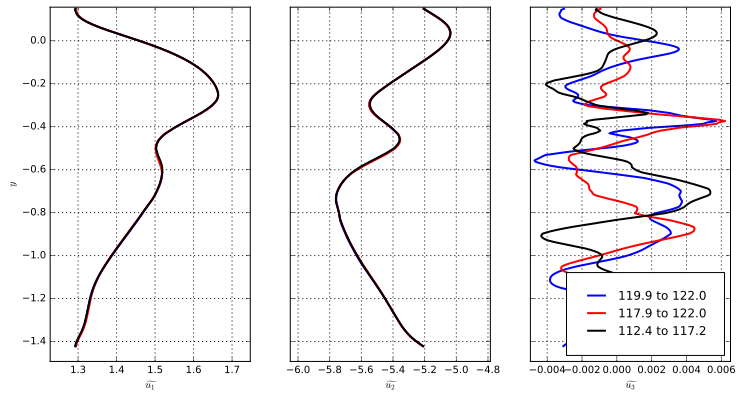

In [11]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,2))
plot_ids.append(wake[0].l[0].var.get_index(101,3))
plot_ids.append(wake[0].l[0].var.get_index(101,16))



for j in range(n_prof):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,[1],fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_mean_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_mean_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. M

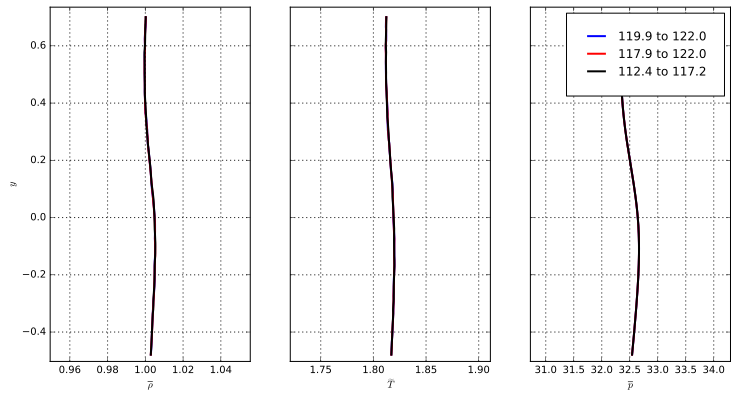

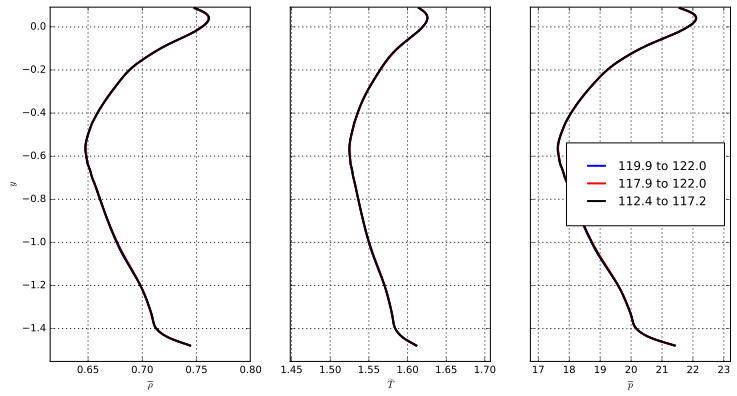

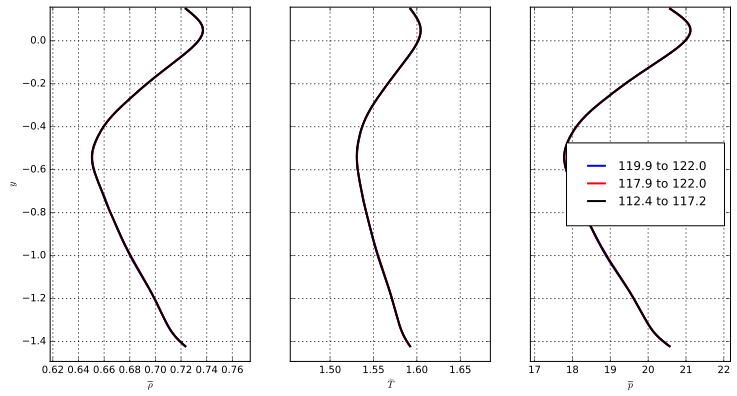

In [12]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,1))
plot_ids.append(wake[0].l[0].var.get_index(101,4))
plot_ids.append(wake[0].l[0].var.get_index(101,5))



for j in range(n_prof):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,[1],fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_therm_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_therm_%s_%i.pdf"%(name_for_files,j))

Wake profiles for x position:  -0.3
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}
Wake profiles for x position:  1.1
file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. M

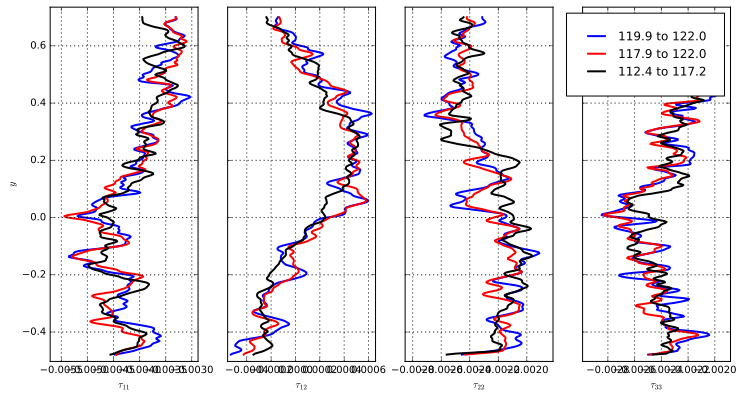

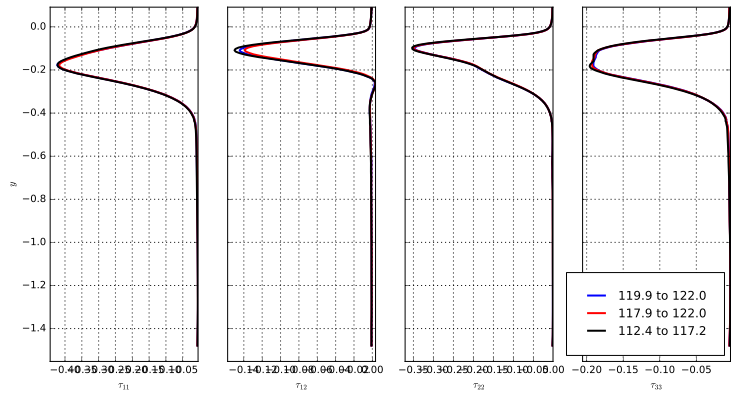

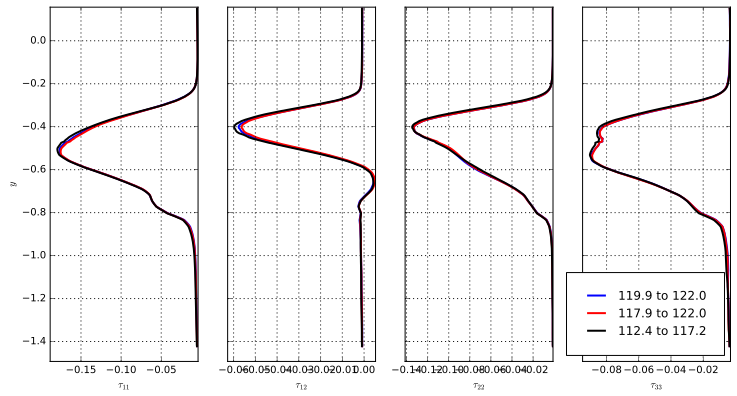

In [13]:
plot_ids=[]
plot_ids.append(wake[0].l[0].var.get_index(101,10))
plot_ids.append(wake[0].l[0].var.get_index(101,11))
plot_ids.append(wake[0].l[0].var.get_index(101,12))
plot_ids.append(wake[0].l[0].var.get_index(101,13))


for j in range(n_prof):
    print 'Wake profiles for x position: ',wp[j][0][0] 
    wake[j].plot_var(plot_ids,[1],fig_num=j)
    plt.figure(j)
    if tikz:
        tikz_save("stat_conv_tau_%s_%i.tikz"%(name_for_files,j),
                  figureheight = '\\fh',
                  figurewidth = '\\fw')
    if pdf:
        plt.savefig("stat_conv_tau_%s_%i.pdf"%(name_for_files,j))  

In [14]:
if False:
    plot_ids=[]
    plot_ids.append(wake[0].l[0].var.get_index(105,1))
    plot_ids.append(wake[0].l[0].var.get_index(105,2))
    plot_ids.append(wake[0].l[0].var.get_index(105,8))



    for j in range(n_prof):
        print 'Wake profiles for x position: ',wp[j][0][0] 
        wake[j].plot_var(plot_ids,1,fig_num=j)
        plt.figure(j)
        if tikz:
            tikz_save("stat_conv_tke_%s_%i.tikz"%(name_for_files,j),
                      figureheight = '\\fh',
                      figurewidth = '\\fw')
        if pdf:
            plt.savefig("stat_conv_tke_%s_%i.pdf"%(name_for_files,j))

## Selected case

In [15]:
case_index=2
filen=postdir[case_index]+'/STAT_cont.bin'

In [16]:
cascade=l.cascade_mean(-0.3,1.26,filename=filen,infile='../cascade3d.in',Refplane='Outlet',chord=1.74)

reading data from file previously extracted
reading data from file previously extracted
198
extract line from (i,j) 224 1  to  224 672  in block  4 672
reading data from file previously extracted
extract line from (i,j) 224 1  to  224 224  in block  3 224
extract line from (i,j) 224 1  to  224 672  in block  5 672
extract line from (i,j) 224 1  to  224 384  in block  7 384
len=1.5631262362
len=1.56658768654


/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1347: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.tang!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1350: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.plus_coords!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1352: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.cf!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1354: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.dist!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:2658: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self.blade.dist!=None:
/home/rp3e11/codes/PLATUS_GIT/platus/lines.py:1488: FutureWarning: comparison to `None` will result in an elementwise object

file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


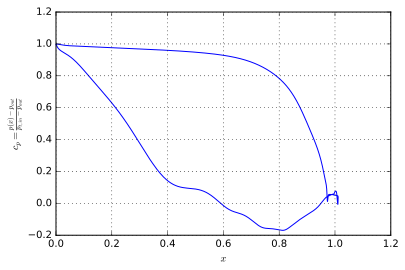

In [17]:
plt.figure()
plt.plot(cascade.blade.data[:,0],cascade.cp)
plt.grid()
plt.xlabel('$x$')
plt.ylabel('$c_p= \\frac{p(x)-p_{out}}{p_{t,in}-p_{out}}$')
tikz_save("cp_blade.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

file encoding: None
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Do not draw skipped stuff. Might cause problems!
Please add the following line to your LaTeX preamble:

\usepackage{pgfplots}


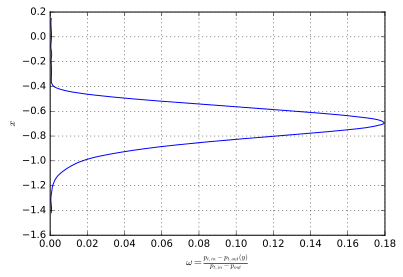

In [18]:
plt.figure()
plt.plot(cascade.loss_mix,cascade.outlet.data[:,1])
plt.grid()
plt.ylabel('$x$')
plt.xlabel('$\omega= \\frac{p_{t,in}-p_{t,out}(y)}{p_{t,in}-p_{out}}$')
tikz_save("wake_loss.tikz",
              figureheight = '\\fh',
              figurewidth = '\\fw')  

In [19]:
cascade.report_integral_mixed_out()

Isentropic Reynolds Number:    536390.75247
Isentropic Mach Number:    0.9165932218
Isentropic Reynolds Number:    544647.35406 (inlet mass averaged)
Isentropic Mach Number:    0.9165901521 (inlet mass averaged)
Isentropic exit Velocity:    5.6425742647
Mixed out loss    0.0352356862
Inlet angle:    0.0483525835
Inlet Mach number:    0.1484332285
Inlet stagnation pressure:   33.0160116790
Inlet stagnation Temperature:    1.8239329665
Inlet static pressure:   32.5118237316
Inlet static Temperature:    1.8159310940
Outlet angle:  -75.0173177073
Outlet Mach number:    0.9029707777
Outlet stagnation pressure:   32.5281617413
Outlet stagnation Temperature:    1.8166592982
Outlet static pressure:   19.1706750309
Outlet static Temperature:    1.5619501435
Outlet density:    0.6873188662


# Monitor point trends

Analyze monitor points for one upstream and down stream position to check for trends

## Write out data to compare cases

In [ ]:
print postdir[case_index]
stat_file=postdir[case_index]+'/STAT_cont.bin'

In [ ]:
rho_ind=wake[1].l[case_index].var.get_index(101,1)
u_ind=wake[1].l[case_index].var.get_index(101,2)
v_ind=wake[1].l[case_index].var.get_index(101,3)
p_ind=wake[1].l[case_index].var.get_index(101,5)
T_ind=wake[1].l[case_index].var.get_index(101,4)
tau11_ind=wake[1].l[case_index].var.get_index(101,10)
tau22_ind=wake[1].l[case_index].var.get_index(101,12)
tau33_ind=wake[1].l[case_index].var.get_index(101,13)
tau12_ind=wake[1].l[case_index].var.get_index(101,11)
tau33_ind=wake[1].l[case_index].var.get_index(101,13)
P_ind=wake[1].l[case_index].var.get_index(105,1)
eps_ind=wake[1].l[case_index].var.get_index(105,8)
k_ind=wake[1].l[case_index].var.get_index(109,12)
Ti_ind=wake[1].l[case_index].var.get_index(119,4)

In [ ]:
for i in range(3):
    dataset=wake[i+1].l[case_index]
    outlet_comp_file='outlet_comp_%s_%i.dat'%(name_for_files,i+1)
    of=open(outlet_comp_file,'w')
    of.write('%25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s %25s\n'%('y','rho_bar','u_tile','v_tile','p_bar','T_tile','tau_11,','tau_22','tau_33','tau_12,','k','P','epsilon','TI'))
    of.write('x=%15.8f, npoints = %i\n'%(dataset.data[0,0],dataset.npoints))    
    for j in range(dataset.npoints):
            of.write('%25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f %25.12f\n'%(dataset.data[j,1],dataset.data[j,rho_ind],dataset.data[j,u_ind],dataset.data[j,v_ind],
                                   dataset.data[j,p_ind],dataset.data[j,T_ind],dataset.data[j,tau11_ind],dataset.data[j,tau22_ind],
                                   dataset.data[j,tau33_ind],dataset.data[j,tau12_ind],dataset.data[j,k_ind],dataset.data[j,P_ind],
                                   dataset.data[j,eps_ind],dataset.data[j,Ti_ind]))          
    of.close()